In [18]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [19]:
iris=load_iris

In [20]:
data1=sns.load_dataset('iris')
data1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [21]:
data=data1.drop(columns=['sepal_length','sepal_width','species'],axis=1)

In [22]:
data

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [23]:
data.shape

(150, 2)

Text(0, 0.5, 'petal_width')

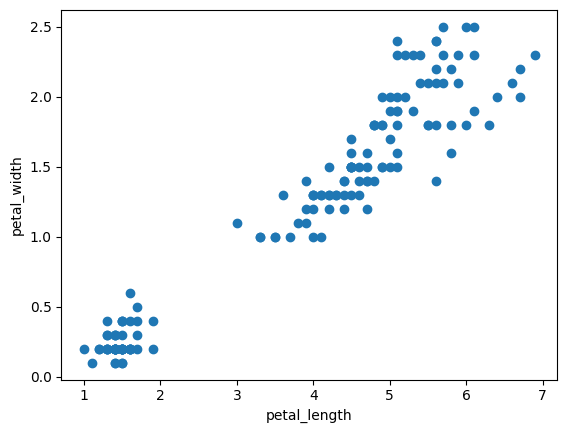

In [24]:
plt.scatter(data['petal_length'],data['petal_width'])
plt.xlabel('petal_length')
plt.ylabel('petal_width')

In [25]:
sse=[]
for k in range(1,len(data)):
    km=KMeans(n_clusters=k)
    km.fit(data[['petal_length','petal_width']])
    sse.append(km.inertia_)


Text(0, 0.5, 'sse')

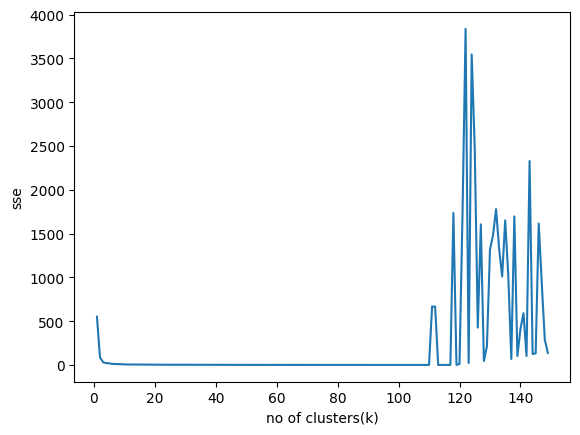

In [26]:
plt.plot(range(1,len(data)),sse)
plt.xlabel('no of clusters(k)')
plt.ylabel('sse')

In [30]:
km=KMeans(n_clusters=3,random_state=12)
prediction=km.fit_predict(data[['petal_length','petal_width']])

In [31]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
data['clusters']=prediction
data

,petal_length,petal_width,clusters
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [33]:
c=km.cluster_centers_
c

array([[1.462     , 0.246     ],
       [4.29259259, 1.35925926],
       [5.62608696, 2.04782609]])

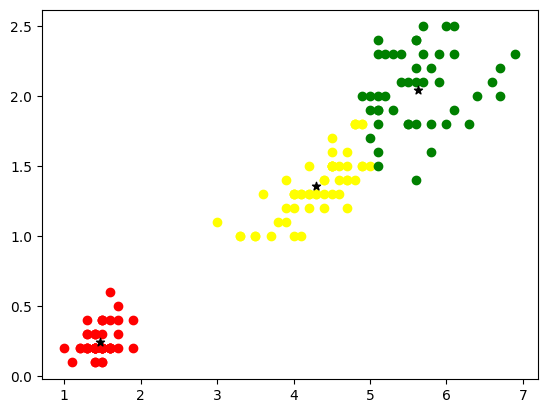

In [35]:
df1=data[data['clusters']==0]
df2=data[data['clusters']==1]
df3=data[data['clusters']==2]

plt.scatter(df1['petal_length'],df1['petal_width'],color='red')
plt.scatter(df2['petal_length'],df2['petal_width'],color='yellow')
plt.scatter(df3['petal_length'],df3['petal_width'],color='green')

plt.scatter(c[:,0],c[:,1],color='black',marker='*')

In [36]:
from sklearn.preprocessing import MinMaxScaler
sca=MinMaxScaler()

sca.fit(data[['petal_width']])
data['petal_width']=sca.transform(data[['petal_width']])

sca.fit(data[['petal_length']])
data["petal_length"]=sca.transform(data[["petal_length"]])
data

,petal_length,petal_width,clusters
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0
4,0.067797,0.041667,0
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2


In [37]:
km=KMeans(n_clusters=3,random_state=12)
prediction=km.fit_predict(data[['petal_length','petal_width']])

In [38]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [39]:
data['cluster2']=prediction
data

,petal_length,petal_width,clusters,cluster2
0,0.067797,0.041667,0,0
1,0.067797,0.041667,0,0
2,0.050847,0.041667,0,0
3,0.084746,0.041667,0,0
4,0.067797,0.041667,0,0
...,...,...,...,...
145,0.711864,0.916667,2,2
146,0.677966,0.750000,2,2
147,0.711864,0.791667,2,2
148,0.745763,0.916667,2,2


In [40]:
centroid=km.cluster_centers_
centroid

array([[0.07830508, 0.06083333],
       [0.55867014, 0.51041667],
       [0.7740113 , 0.81510417]])

Text(0, 0.5, 'petal_width')

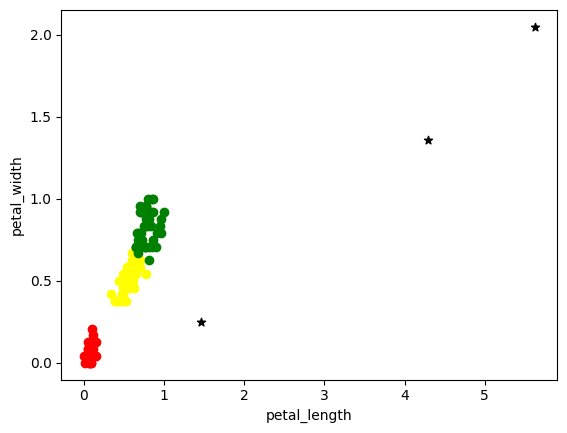

In [41]:
df1=data[data['cluster2']==0]
df2=data[data['cluster2']==1]
df3=data[data['cluster2']==2]

plt.scatter(df1['petal_length'],df1['petal_width'],color='red')
plt.scatter(df2['petal_length'],df2['petal_width'],color='yellow')
plt.scatter(df3['petal_length'],df3['petal_width'],color='green')

plt.scatter(c[:,0],c[:,1],color='black',marker='*')
plt.xlabel('petal_length')
plt.ylabel('petal_width')

In [42]:
values=[[25,50000]]

In [43]:
scaled_values=sca.fit_transform(values)

In [44]:
km.predict(values)

array([2])

In [45]:
km.predict(scaled_values)

array([0])

In [46]:
km.predict(values)

array([2])